In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sqlalchemy import create_engine
%matplotlib inline

In [5]:
df = pd.read_csv('CrimeofIndia.csv')


In [6]:
#cleaning of data
df.drop(df.index[(df['States/UTs']=='Total (States)') ],axis=0,inplace=True)
df.drop(df.index[(df['States/UTs']=='Total (UTs)') ],axis=0,inplace=True)
df.drop(df.index[(df['States/UTs']=='Total (All India)') ],axis=0,inplace=True)


In [7]:
df.duplicated().sum()

0

In [8]:
pcso_df = df[df["Crime Head"].str.contains("pcso|protection of children", case=False, na=False)]

aggregated_data = pcso_df.drop(columns='Crime Head').groupby(['States/UTs', 'Year']).sum(numeric_only=True).reset_index()

aggregated_data["Crime Head"] = "19-Protection of Children from Sexual Offences Act"

cleaned_crime_data = df[~df["Crime Head"].str.contains("pcso|protection of children", case=False, na=False)]

final_data = pd.concat([cleaned_crime_data, aggregated_data], ignore_index=True)

df=final_data




In [9]:
sh_df = df[df["Crime Head"].str.contains("sexual harassment| outrage her modesty| intent to disrobe| voyeurism|stalking| others assault", case=False, na=False)]

aggregated_data = sh_df.drop(columns='Crime Head').groupby(['States/UTs', 'Year']).sum(numeric_only=True).reset_index()

aggregated_data["Crime Head"] = "4-Sexual Harrasment/Stalking/other assault"

cleaned_crime_data = df[~df["Crime Head"].str.contains("sexual harassment| outrage her modesty| intent to disrobe| voyeurism|stalking| others assault", case=False, na=False)]

final_data = pd.concat([cleaned_crime_data, aggregated_data], ignore_index=True)

df=final_data



In [10]:
oca_df = df[df["Crime Head"].str.contains("Offences ", case=False, na=False)]

aggregated_data = oca_df.drop(columns='Crime Head').groupby(['States/UTs', 'Year']).sum(numeric_only=True).reset_index()

aggregated_data["Crime Head"] = "24-Offences committed against SCs/STs/Others"

cleaned_crime_data = df[~df["Crime Head"].str.contains("Offences ", case=False, na=False)]

final_data = pd.concat([cleaned_crime_data, aggregated_data], ignore_index=True)

df=final_data



In [11]:
itp_df = df[df["Crime Head"].str.contains(" ITP | Immoral Traffic | Other Section of ITP Act ", case=False, na=False)]

aggregated_data = itp_df.drop(columns='Crime Head').groupby(['States/UTs', 'Year']).sum(numeric_only=True).reset_index()

aggregated_data["Crime Head"] = "17-Immoral Traffic Prevention Act, 1956"

cleaned_crime_data = df[~df["Crime Head"].str.contains(" ITP | Immoral Traffic | Other Section of ITP Act ", case=False, na=False)]

final_data = pd.concat([cleaned_crime_data, aggregated_data], ignore_index=True)

df=final_data



In [12]:
kidnapp_df = df[df["Crime Head"].str.contains("kidnapping | kidnaping | other kidnapping", case=False, na=False)]

aggregated_data = kidnapp_df.drop(columns='Crime Head').groupby(['States/UTs', 'Year']).sum(numeric_only=True).reset_index()

aggregated_data["Crime Head"] = "6-Kidnapping / Abduction "

cleaned_crime_data = df[~df["Crime Head"].str.contains("kidnapping | kidnaping | other kidnapping", case=False, na=False)]

final_data = pd.concat([cleaned_crime_data, aggregated_data], ignore_index=True)

df=final_data

df

,States/UTs,Crime Head,Year,Persons arrested during the year_Male,Persons arrested during the year_Female,Persons arrested during the year_Total,Total number of persons under Trial_Male,Total number of persons under Trial_Female,Total number of persons under Trial_Total,Persons whose cases trials were completed during the year_Male,Persons whose cases trials were completed during the year_Female,Persons whose cases trials were completed during the year_Total,Persons convicted_Male,Persons convicted_Female,Persons convicted_Total,Persons acquitted_Male,Persons acquitted_Female,Persons acquitted_Total
0,Andhra Pradesh,1 - Murder (Section 302 and 303 IPC),2014,68,5,73,171,2,173,32,1,33,3,0,3,29,1,30
1,Arunachal Pradesh,1 - Murder (Section 302 and 303 IPC),2014,3,0,3,3,0,3,0,0,0,0,0,0,0,0,0
2,Assam,1 - Murder (Section 302 and 303 IPC),2014,25,0,25,21,0,21,6,0,6,1,0,1,5,0,5
3,Bihar,1 - Murder (Section 302 and 303 IPC),2014,100,0,100,870,0,870,78,0,78,18,0,18,60,0,60
4,Chhattisgarh,1 - Murder (Section 302 and 303 IPC),2014,73,5,78,197,5,202,31,0,31,15,0,15,16,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Telangana,6-Kidnapping / Abduction,2014,1496,6,1502,2470,14,2484,466,8,474,20,0,20,446,8,454
752,Tripura,6-Kidnapping / Abduction,2014,146,2,148,294,4,298,26,0,26,6,0,6,20,0,20
753,Uttar Pradesh,6-Kidnapping / Abduction,2014,21932,1142,23074,44538,1632,46170,5912,372,6284,2832,164,2996,2970,208,3178
754,Uttarakhand,6-Kidnapping / Abduction,2014,236,0,236,476,0,476,56,0,56,32,0,32,24,0,24


In [13]:
df.isnull().sum()

,0
States/UTs,0
Crime Head,0
Year,0
Persons arrested during the year_Male,0
Persons arrested during the year_Female,0
Persons arrested during the year_Total,0
Total number of persons under Trial_Male,0
Total number of persons under Trial_Female,0
Total number of persons under Trial_Total,0
Persons whose cases trials were completed during the year_Male,0


In [14]:
state_wise=df.groupby('States/UTs')
st_wise=state_wise['Persons arrested during the year_Total'].sum().reset_index()
st_wise

,States/UTs,Persons arrested during the year_Total
0,A & N Islands,135
1,Andhra Pradesh,6023
2,Arunachal Pradesh,313
3,Assam,3505
4,Bihar,6618
5,Chandigarh,336
6,Chhattisgarh,9654
7,D&N Haveli,17
8,Daman & Diu,14
9,Delhi UT,7305


<ipython-input-15-ececdcd76bbb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  res = sns.barplot(x='States/UTs', y='Persons arrested during the year_Total',data=st_wise, palette="magma")


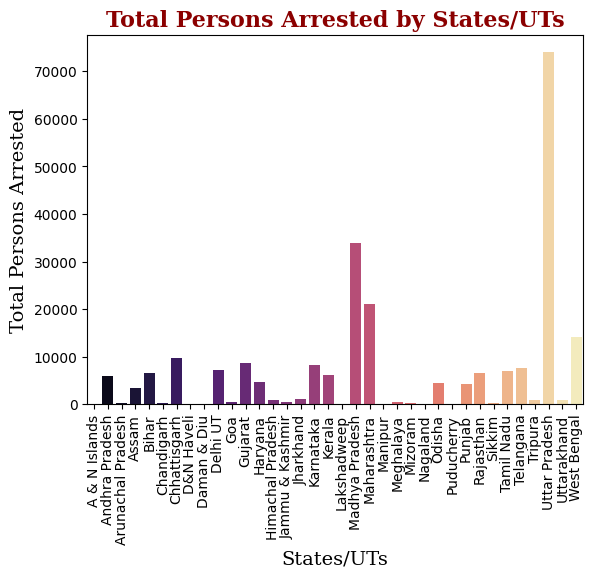

In [15]:
res = sns.barplot(x='States/UTs', y='Persons arrested during the year_Total',data=st_wise, palette="magma")
t = {'fontsize': 16, 'fontweight': 'bold', 'color': 'darkred', 'family': 'serif'}
l = {'fontsize': 14, 'fontweight': 'medium', 'color': 'black','family':'serif' }

plt.title("Total Persons Arrested by States/UTs", fontdict=t)
plt.xlabel("States/UTs", fontdict=l)
plt.ylabel("Total Persons Arrested", fontdict=l)

plt.xticks(rotation=90)
plt.show()

In [16]:
import os
print(os.getcwd())

/content


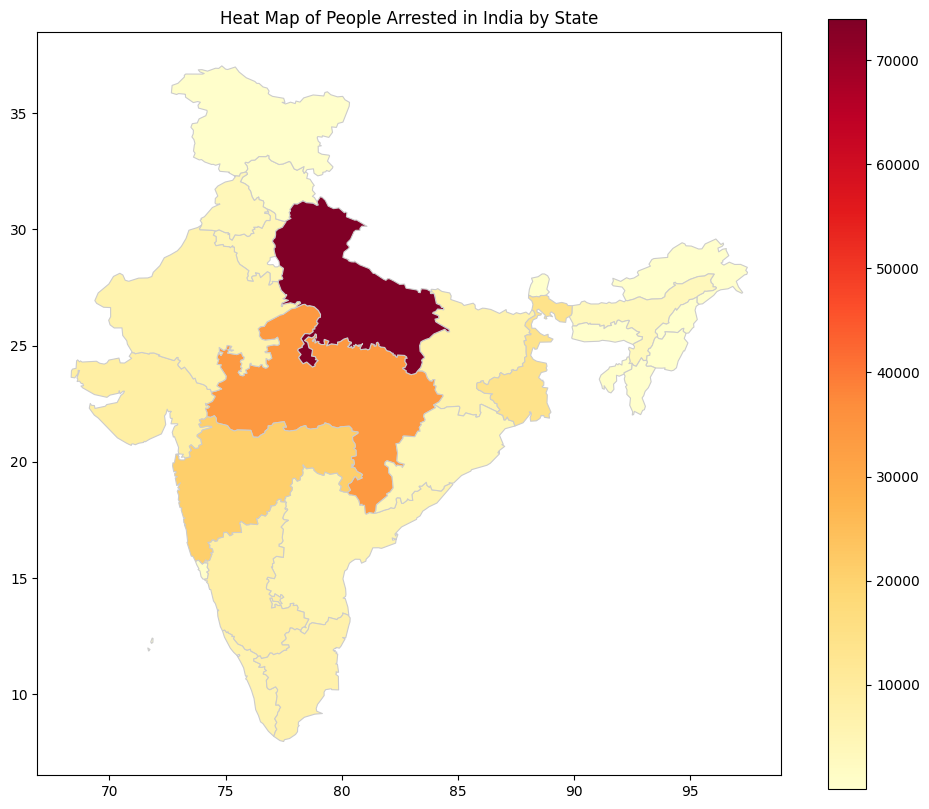

In [17]:
india_map = gpd.read_file("india_st.shp")
state_wise=df.groupby('States/UTs')
mapdata=state_wise['Persons arrested during the year_Total'].sum().reset_index()


india_map.loc[india_map['STATE'] == 'JAMMU AND KASHMIR', 'STATE'] = 'Jammu & Kashmir'
india_map.loc[india_map['STATE'] == 'ORISSA', 'STATE'] = 'Odisha'


data_df = pd.DataFrame(mapdata)

india_map["STATE"] = india_map["STATE"].str.lower()
data_df["States/UTs"] = data_df["States/UTs"].str.lower()


india_data = india_map.merge(data_df, left_on="STATE", right_on="States/UTs", how="left")


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
india_data.plot(column="Persons arrested during the year_Total", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Heat Map of People Arrested in India by State")
plt.show()

In [18]:
crime_wise=df.groupby('Crime Head')
c_wise=crime_wise[['Persons arrested during the year_Female','Persons arrested during the year_Male']].sum().reset_index()
c_wise

,Crime Head,Persons arrested during the year_Female,Persons arrested during the year_Male
0,1 - Murder (Section 302 and 303 IPC),154,2605
1,10 - Procuration of minor girls (Section 366-A...,19,1948
2,11 - Importation of Girls from Foreign Country...,2,4
3,12 - Buying of minors for prostitution (Sectio...,1,30
4,13 - Selling of minors for prostitution (Secti...,15,94
5,"14 - Prohibition of Child Marriage Act, 2006",147,571
6,"15 - Transplantation of Human Organs Act, 1994",0,0
7,16 - Child Labour (Prohibition & Regulation) A...,3,153
8,"17-Immoral Traffic Prevention Act, 1956",142,276
9,2 - Infanticide (Section 315 IPC),6,73


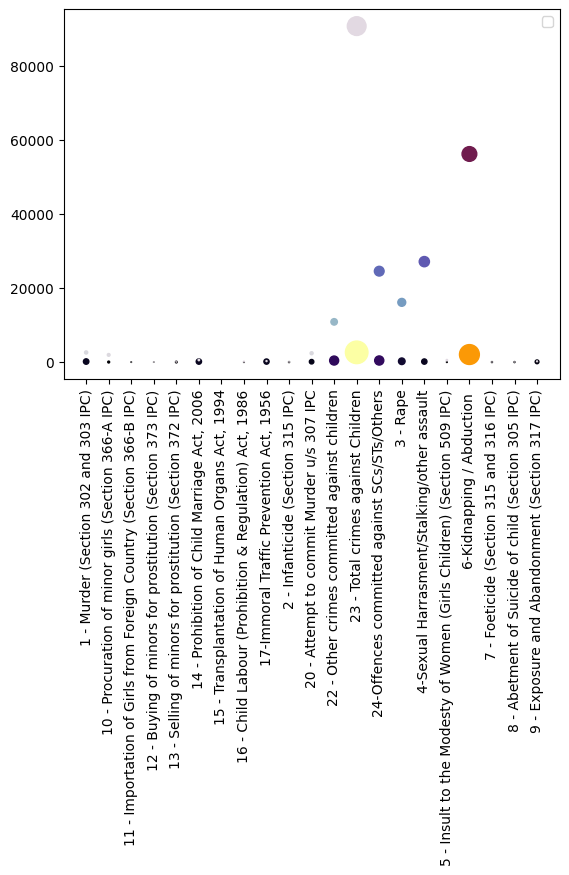

In [19]:
x=c_wise["Crime Head"]
y=c_wise["Persons arrested during the year_Female"]
z=c_wise["Persons arrested during the year_Male"]
c1 = c_wise["Persons arrested during the year_Female"]/100
c2 = c_wise["Persons arrested during the year_Male"]/5000
s1 =c_wise["Persons arrested during the year_Female"]/10
s2 = c_wise["Persons arrested during the year_Male"]/500
plt.scatter(x,y,c=c1,s=s1, cmap='inferno')
plt.scatter(x,z,c=c2,s=s2, cmap='twilight')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [20]:
crime_wise=df.groupby('Crime Head')
crime_wise[['Persons arrested during the year_Female','Persons arrested during the year_Male']].sum().sum().reset_index()

,index,0
0,Persons arrested during the year_Female,6591
1,Persons arrested during the year_Male,234825


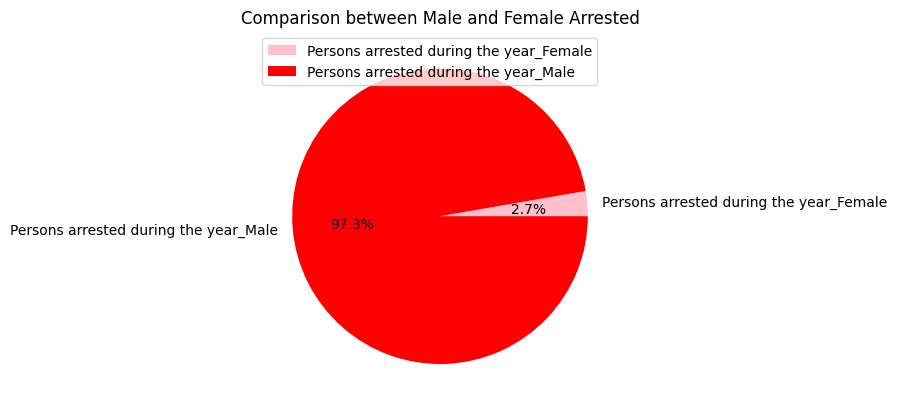

In [21]:
pie=crime_wise[['Persons arrested during the year_Female','Persons arrested during the year_Male']].sum().sum().reset_index()
y=pie[0]
colour=["pink","red"]
plt.pie(y, labels = pie['index'], autopct='%1.1f%%', colors=colour)
plt.legend(loc='upper left')
plt.title('Comparison between Male and Female Arrested')
plt.show()

In [22]:
crimestate_wise=df.groupby(['States/UTs','Crime Head'])
print(crimestate_wise[['Persons arrested during the year_Female','Persons arrested during the year_Male']].sum().to_string())


                                                                                         Persons arrested during the year_Female  Persons arrested during the year_Male
States/UTs        Crime Head                                                                                                                                           
A & N Islands     1 - Murder (Section 302 and 303 IPC)                                                                         1                                      0
                  10 - Procuration of minor girls (Section 366-A IPC)                                                          0                                      0
                  11 - Importation of Girls from Foreign Country (Section 366-B IPC)                                           0                                      0
                  12 - Buying of minors for prostitution (Section 373 IPC)                                                     0                                

In [23]:
df[['Persons convicted_Total','Persons acquitted_Total']].sum().reset_index()

,index,0
0,Persons convicted_Total,21143
1,Persons acquitted_Total,44280


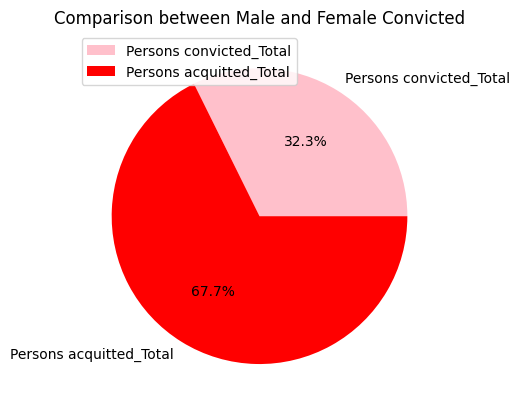

In [24]:
pie=df[['Persons convicted_Total','Persons acquitted_Total']].sum().reset_index()
y=pie[0]
colour=["pink","red"]
plt.pie(y, labels = pie['index'], autopct='%1.1f%%', colors=colour)
plt.legend(loc='upper left')
plt.title('Comparison between Male and Female Convicted')
plt.show()

In [25]:
conacq=df.groupby('Crime Head')
conacq=conacq[['Persons convicted_Male','Persons convicted_Female','Persons acquitted_Male','Persons acquitted_Female']].sum().reset_index()
conacq

,Crime Head,Persons convicted_Male,Persons convicted_Female,Persons acquitted_Male,Persons acquitted_Female
0,1 - Murder (Section 302 and 303 IPC),615,9,761,20
1,10 - Procuration of minor girls (Section 366-A...,33,0,254,3
2,11 - Importation of Girls from Foreign Country...,0,0,0,0
3,12 - Buying of minors for prostitution (Sectio...,0,0,0,0
4,13 - Selling of minors for prostitution (Secti...,3,2,26,1
5,"14 - Prohibition of Child Marriage Act, 2006",43,6,294,29
6,"15 - Transplantation of Human Organs Act, 1994",0,0,0,0
7,16 - Child Labour (Prohibition & Regulation) A...,3,0,7,0
8,"17-Immoral Traffic Prevention Act, 1956",0,0,38,30
9,2 - Infanticide (Section 315 IPC),29,0,28,2


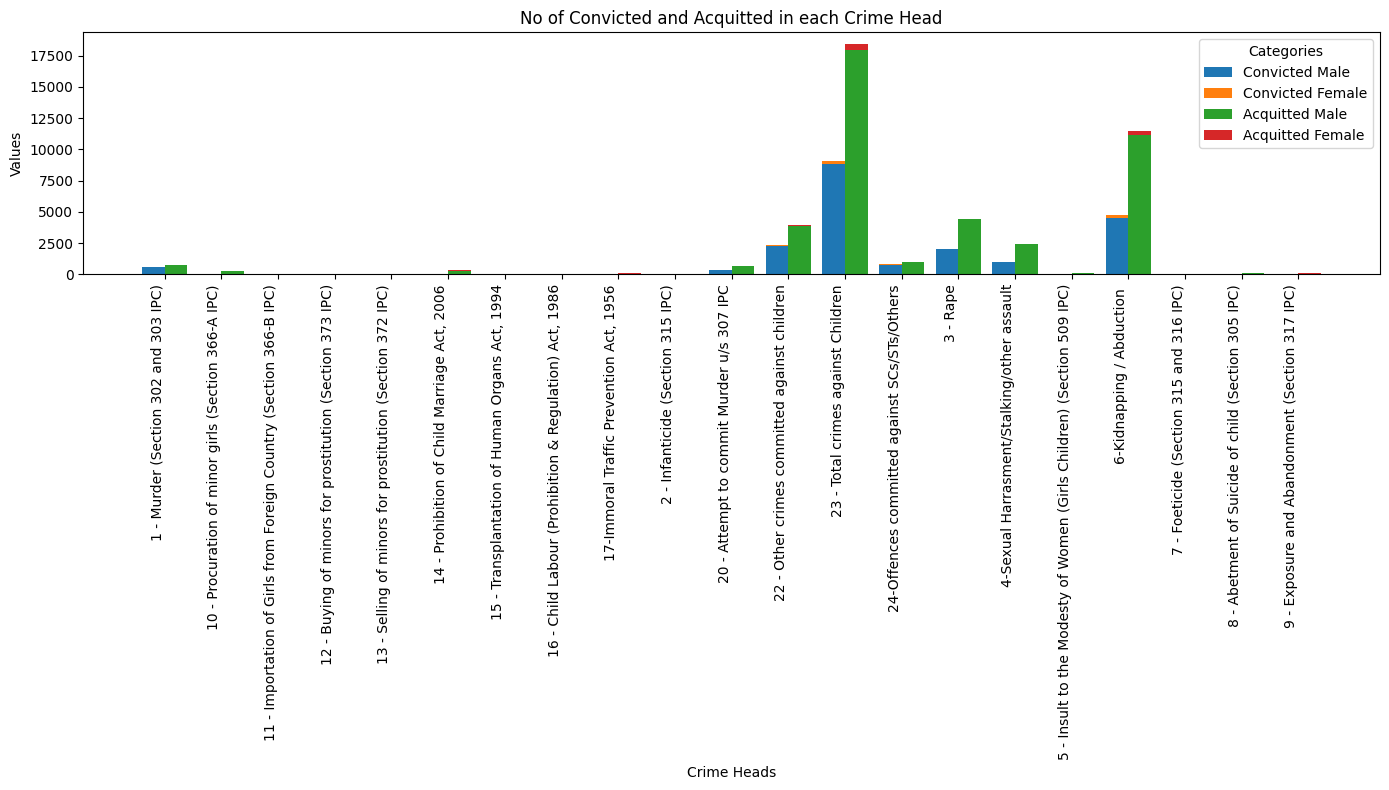

In [26]:

crime_heads = conacq['Crime Head']

bar_width = 0.4
x = np.arange(len(crime_heads))

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x - bar_width / 2, conacq['Persons convicted_Male'], width=bar_width, label='Convicted Male')
ax.bar(x - bar_width / 2, conacq['Persons convicted_Female'], width=bar_width, bottom=conacq['Persons convicted_Male'], label='Convicted Female')
ax.bar(x + bar_width / 2, conacq['Persons acquitted_Male'], width=bar_width, label='Acquitted Male')
ax.bar(x + bar_width / 2, conacq['Persons acquitted_Female'], width=bar_width, bottom=conacq['Persons acquitted_Male'], label='Acquitted Female')


ax.set_xlabel('Crime Heads')
ax.set_ylabel('Values')
ax.set_title('No of Convicted and Acquitted in each Crime Head')
ax.set_xticks(x)
ax.set_xticklabels(crime_heads, rotation=90, ha='right')
ax.legend(title='Categories')


plt.tight_layout()
plt.show()


In [27]:
df.to_csv('output.csv',index=False)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [29]:
crime_head=df.groupby('Crime Head')
c_head=crime_head[['Total number of persons under Trial_Total','Persons whose cases trials were completed during the year_Total']].sum().reset_index()
c_head

c_head['Cases Pending'] = c_head['Total number of persons under Trial_Total'] - c_head['Persons whose cases trials were completed during the year_Total']
c_head.sort_values(by='Cases Pending',ascending=False)

,Crime Head,Total number of persons under Trial_Total,Persons whose cases trials were completed during the year_Total,Cases Pending
12,23 - Total crimes against Children,214980,27913,187067
17,6-Kidnapping / Abduction,141208,16406,124802
14,3 - Rape,46607,6530,40077
11,22 - Other crimes committed against children,37536,6353,31183
15,4-Sexual Harrasment/Stalking/other assault,34482,3442,31040
13,24-Offences committed against SCs/STs/Others,26054,1858,24196
0,1 - Murder (Section 302 and 303 IPC),10866,1410,9456
10,20 - Attempt to commit Murder u/s 307 IPC,6212,1121,5091
1,10 - Procuration of minor girls (Section 366-A...,3358,298,3060
8,"17-Immoral Traffic Prevention Act, 1956",2338,68,2270


<ipython-input-30-fe6c885a6ad7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Crime Head',y='Total number of persons under Trial_Total', data=c_head, palette='magma', label='Persons Under Trial')
<ipython-input-30-fe6c885a6ad7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Crime Head',y='Persons whose cases trials were completed during the year_Total',data=c_head, palette='coolwarm', label='Trials Completed')


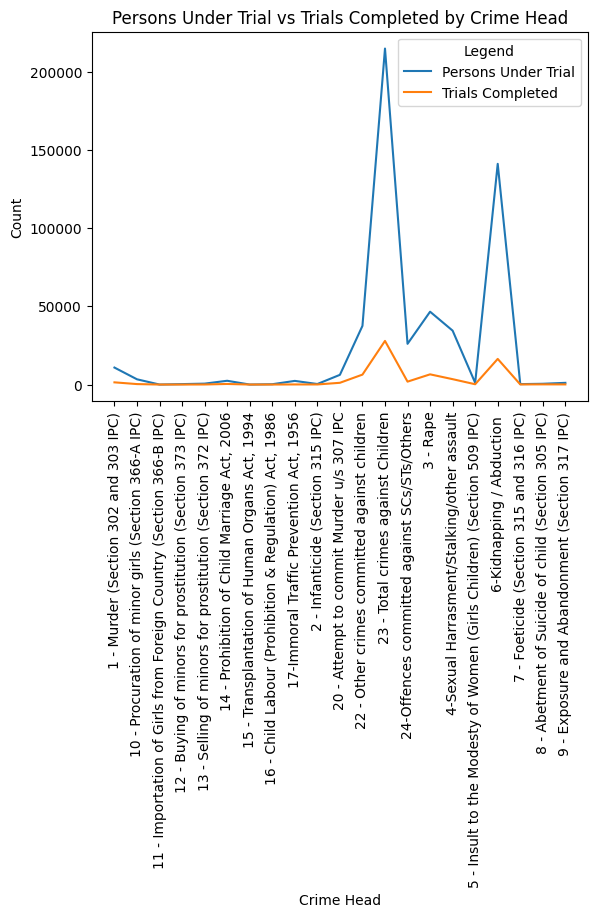

In [30]:
sns.lineplot(x='Crime Head',y='Total number of persons under Trial_Total', data=c_head, palette='magma', label='Persons Under Trial')

sns.lineplot(x='Crime Head',y='Persons whose cases trials were completed during the year_Total',data=c_head, palette='coolwarm', label='Trials Completed')

plt.title("Persons Under Trial vs Trials Completed by Crime Head")
plt.xlabel("Crime Head")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.legend(title="Legend")


plt.show()


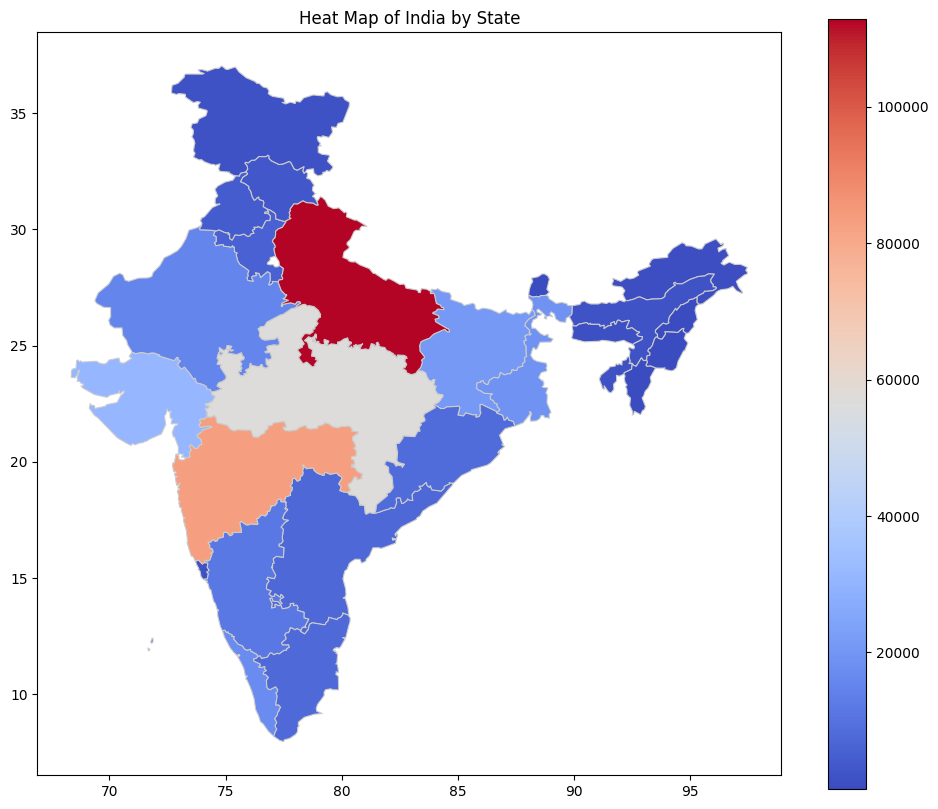

In [31]:
crime_head=df.groupby('States/UTs')
c_head=crime_head[['Total number of persons under Trial_Total','Persons whose cases trials were completed during the year_Total']].sum().reset_index()
c_head

c_head['Cases Pending'] = c_head['Total number of persons under Trial_Total'] - c_head['Persons whose cases trials were completed during the year_Total']
c_head.sort_values(by='Cases Pending',ascending=False)
india_map = gpd.read_file("india_st.shp")


india_map.loc[india_map['STATE'] == 'JAMMU AND KASHMIR', 'STATE'] = 'Jammu & Kashmir'
india_map.loc[india_map['STATE'] == 'ORISSA', 'STATE'] = 'Odisha'


data_df = pd.DataFrame(c_head)

india_map["STATE"] = india_map["STATE"].str.lower()
data_df["States/UTs"] = data_df["States/UTs"].str.lower()


india_data = india_map.merge(data_df, left_on="STATE", right_on="States/UTs", how="left")


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
india_data.plot(column="Cases Pending", cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Heat Map of India by State")
plt.show()

In [32]:
crime_head=df.groupby('Crime Head')
c_head=crime_head[['Persons convicted_Male','Persons convicted_Female','Persons acquitted_Male','Persons acquitted_Female']].mean().reset_index()
c_head


,Crime Head,Persons convicted_Male,Persons convicted_Female,Persons acquitted_Male,Persons acquitted_Female
0,1 - Murder (Section 302 and 303 IPC),17.083333,0.250000,21.138889,0.555556
1,10 - Procuration of minor girls (Section 366-A...,0.916667,0.000000,7.055556,0.083333
2,11 - Importation of Girls from Foreign Country...,0.000000,0.000000,0.000000,0.000000
3,12 - Buying of minors for prostitution (Sectio...,0.000000,0.000000,0.000000,0.000000
4,13 - Selling of minors for prostitution (Secti...,0.083333,0.055556,0.722222,0.027778
5,"14 - Prohibition of Child Marriage Act, 2006",1.194444,0.166667,8.166667,0.805556
6,"15 - Transplantation of Human Organs Act, 1994",0.000000,0.000000,0.000000,0.000000
7,16 - Child Labour (Prohibition & Regulation) A...,0.083333,0.000000,0.194444,0.000000
8,"17-Immoral Traffic Prevention Act, 1956",0.000000,0.000000,1.055556,0.833333
9,2 - Infanticide (Section 315 IPC),0.805556,0.000000,0.777778,0.055556


In [33]:
crime_head=df.groupby('Crime Head')
c_head=crime_head[['Persons arrested during the year_Total','Persons convicted_Total','Persons acquitted_Total']].mean().reset_index()
c_head

,Crime Head,Persons arrested during the year_Total,Persons convicted_Total,Persons acquitted_Total
0,1 - Murder (Section 302 and 303 IPC),76.638889,17.333333,21.694444
1,10 - Procuration of minor girls (Section 366-A...,54.638889,0.916667,7.138889
2,11 - Importation of Girls from Foreign Country...,0.166667,0.000000,0.000000
3,12 - Buying of minors for prostitution (Sectio...,0.861111,0.000000,0.000000
4,13 - Selling of minors for prostitution (Secti...,3.027778,0.138889,0.750000
5,"14 - Prohibition of Child Marriage Act, 2006",19.944444,1.361111,8.972222
6,"15 - Transplantation of Human Organs Act, 1994",0.000000,0.000000,0.000000
7,16 - Child Labour (Prohibition & Regulation) A...,4.333333,0.083333,0.194444
8,"17-Immoral Traffic Prevention Act, 1956",11.611111,0.000000,1.888889
9,2 - Infanticide (Section 315 IPC),2.194444,0.805556,0.833333


In [34]:
crime_head=df.groupby('States/UTs')
c_head=crime_head[['Persons arrested during the year_Total','Persons convicted_Total','Persons acquitted_Total']].mean().reset_index()
c_head

,States/UTs,Persons arrested during the year_Total,Persons convicted_Total,Persons acquitted_Total
0,A & N Islands,6.428571,1.380952,2.333333
1,Andhra Pradesh,286.809524,6.238095,101.000000
2,Arunachal Pradesh,14.904762,0.095238,0.380952
3,Assam,166.904762,2.523810,7.285714
4,Bihar,315.142857,8.380952,76.238095
5,Chandigarh,16.000000,5.619048,11.000000
6,Chhattisgarh,459.714286,84.190476,144.285714
7,D&N Haveli,0.809524,0.000000,0.000000
8,Daman & Diu,0.666667,0.095238,0.190476
9,Delhi UT,347.857143,41.571429,66.571429
